In [3]:
from numpy import mean, std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.feature_selection import  SelectKBest, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot


In [4]:
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

In [5]:
num_features = [i for i in range(X.shape[1] - 19, X.shape[1] + 1)]

In [6]:
results = list()

In [7]:
for k in num_features:
    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression, k=k)
    pipeline = Pipeline(steps=[('sel',fs), ('lr',model)])
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results.append(scores)
    print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

>81 -0.082 (0.006)
>82 -0.082 (0.006)
>83 -0.082 (0.006)
>84 -0.082 (0.006)
>85 -0.082 (0.006)
>86 -0.082 (0.006)
>87 -0.082 (0.006)
>88 -0.082 (0.006)
>89 -0.083 (0.006)
>90 -0.083 (0.006)
>91 -0.083 (0.006)
>92 -0.083 (0.006)
>93 -0.083 (0.006)
>94 -0.083 (0.006)
>95 -0.083 (0.006)
>96 -0.083 (0.006)
>97 -0.083 (0.006)
>98 -0.083 (0.006)
>99 -0.083 (0.006)
>100 -0.083 (0.006)


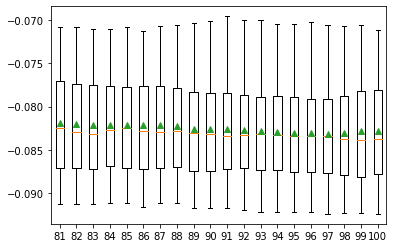

In [8]:
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()